# # In this project we will combrise between  all unsupervised machine learning algorithms for model classification.

We will go through 6 tasks to implement our project:

Task 1: Import the important library and exploring the dataset.

Task 2: Identifying Missing Data and dealing with them.

Task 3: Creating visual methods to analyze the data.

Task 4: Kmeans cluster model.

Task 5: hierarichal cluster model.

Task 6: DB scan cluster model

## Task 1: Import the important library and exploring the dataset.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
sns.set() #setting the default seaborn style for our plots

In [2]:
traffic_df=pd.read_csv('air_traffic_passenger_statistics.csv')
traffic_df.head()

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [3]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   activity_period              15007 non-null  int64 
 1   operating_airline            15007 non-null  object
 2   operating_airline_iata_code  14953 non-null  object
 3   published_airline            15007 non-null  object
 4   published_airline_iata_code  14953 non-null  object
 5   geo_summary                  15007 non-null  object
 6   geo_region                   15007 non-null  object
 7   activity_type_code           15007 non-null  object
 8   price_category_code          15007 non-null  object
 9   terminal                     15007 non-null  object
 10  boarding_area                15007 non-null  object
 11  passenger_count              15007 non-null  int64 
 12  adjusted_activity_type_code  15007 non-null  object
 13  adjusted_passenger_count     15

Expected output:

     1-The data should consist of 15007 data record with 16 attributes. 4 integer type & 12 string (object).
     2-there are missing data

## Task 2: Identifying Missing Data and dealing with them.


In [4]:
# Check for the null values 

traffic_df.isna().apply(pd.value_counts)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
False,15007.0,15007.0,14953,15007.0,14953,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0
True,NaN,NaN,54,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Expected output:
      
                there are 54 missing data

In [5]:
traffic_df.dropna(axis=0,inplace=True) #remove the missing data
traffic_df.shape

(14953, 16)

In [6]:
traffic_df.isna().apply(pd.value_counts)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
False,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953


## Task 3: Creating visual methods to analyze the data.


In [7]:
# a brief summary for the dataset

traffic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
activity_period,14953.0,201044.583963,313.675658,200507.0,200803.0,201011.0,201308.0,201603.0
passenger_count,14953.0,29345.619006,58398.448380,1.0,5409.0,9260.0,21222.0,659837.0
adjusted_passenger_count,14953.0,29437.338862,58362.879319,1.0,5523.0,9418.0,21267.0,659837.0
year,14953.0,2010.380325,3.140994,2005.0,2008.0,2010.0,2013.0,2016.0


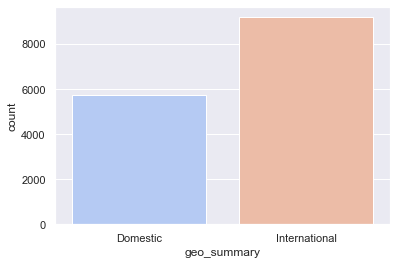

In [8]:
sns.countplot('geo_summary',data=traffic_df,palette='coolwarm')

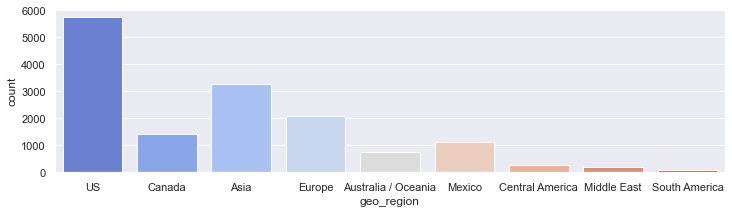

In [9]:
plt.figure(figsize=(12,3))
sns.countplot('geo_region',data=traffic_df,palette='coolwarm')

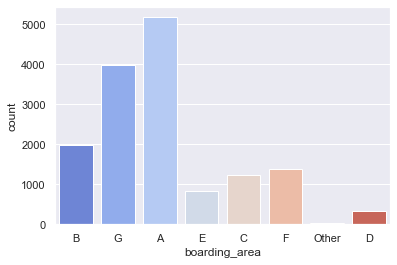

In [10]:
sns.countplot('boarding_area',data=traffic_df,palette='coolwarm')

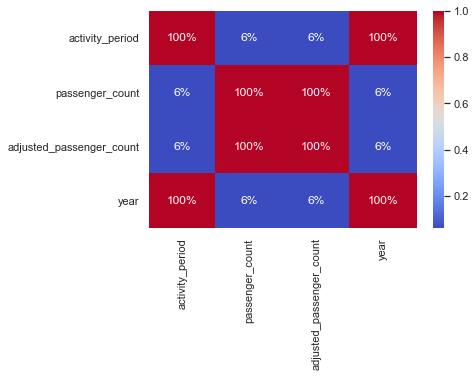

In [11]:
sns.heatmap(traffic_df.corr(),cmap='coolwarm',annot=True,fmt='.0%')

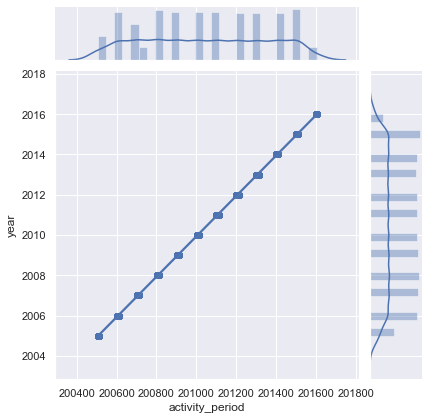

In [12]:
sns.jointplot(x='activity_period',y='year',data=traffic_df ,kind='reg') #pairplot


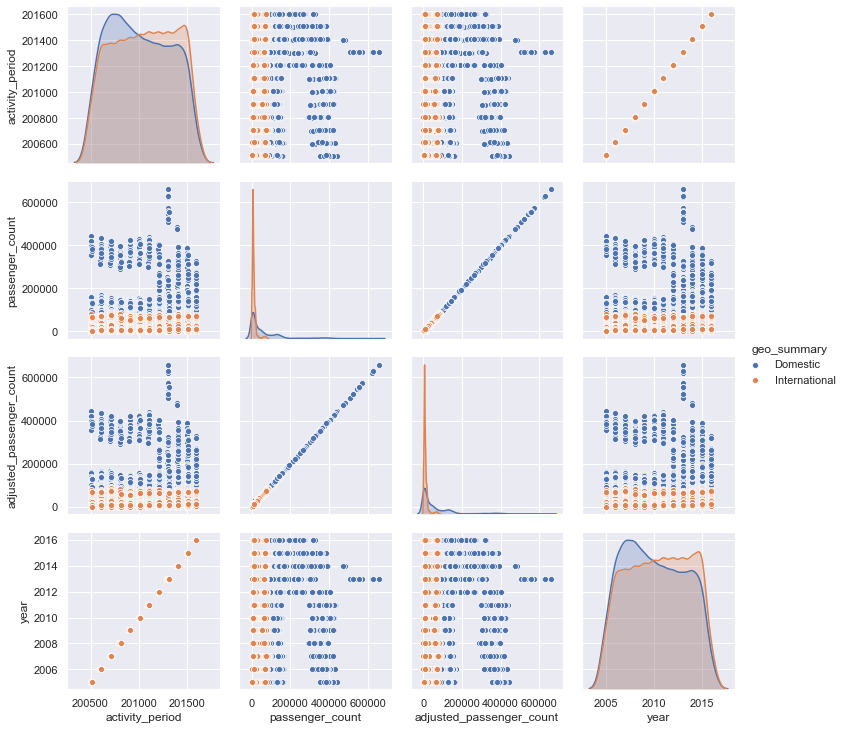

In [13]:
sns.pairplot(traffic_df,hue='geo_summary')  #pairplot


## Task 4: Kmeans cluster model

In [14]:
X = traffic_df.iloc[:, [13, 14]].values

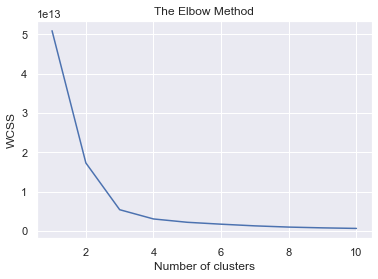

In [15]:
# Draw the elpow graph
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

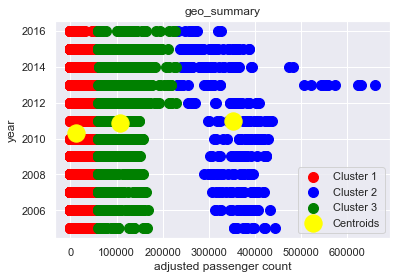

In [17]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow'
            , label = 'Centroids')
plt.title('geo_summary')
plt.xlabel('adjusted passenger count')
plt.ylabel('year')
plt.legend()
plt.show()

# Task 5:  hierarichal  cluster model

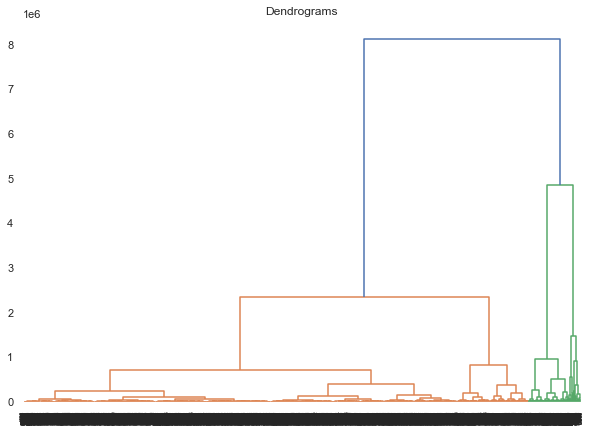

In [18]:
# Draw the dendrogram to choose the best numper of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

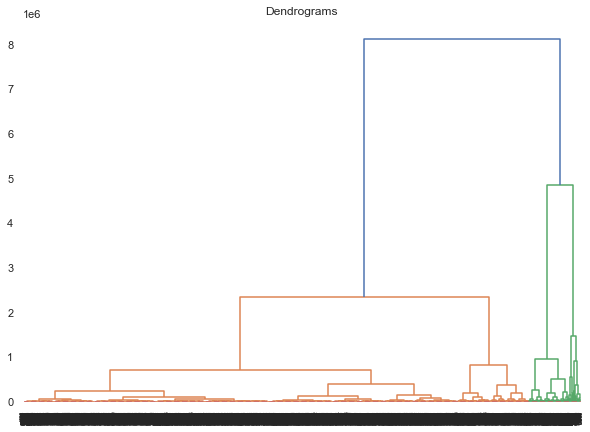

In [19]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')


Text(0.5, 1.0, 'Hierarchical')

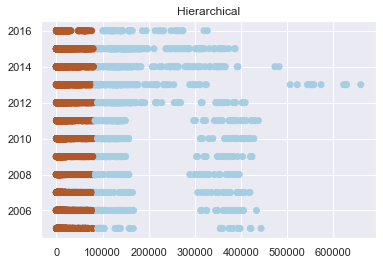

In [21]:
hier = AgglomerativeClustering(n_clusters=2)
y_pred2 = hier.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='Paired')
plt.title("Hierarchical")

## Task 6:  DB scan  cluster model

In [47]:
# Draw k-distance graph to choose the best Eps
from sklearn.neighbors import NearestNeighbors  

In [37]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)


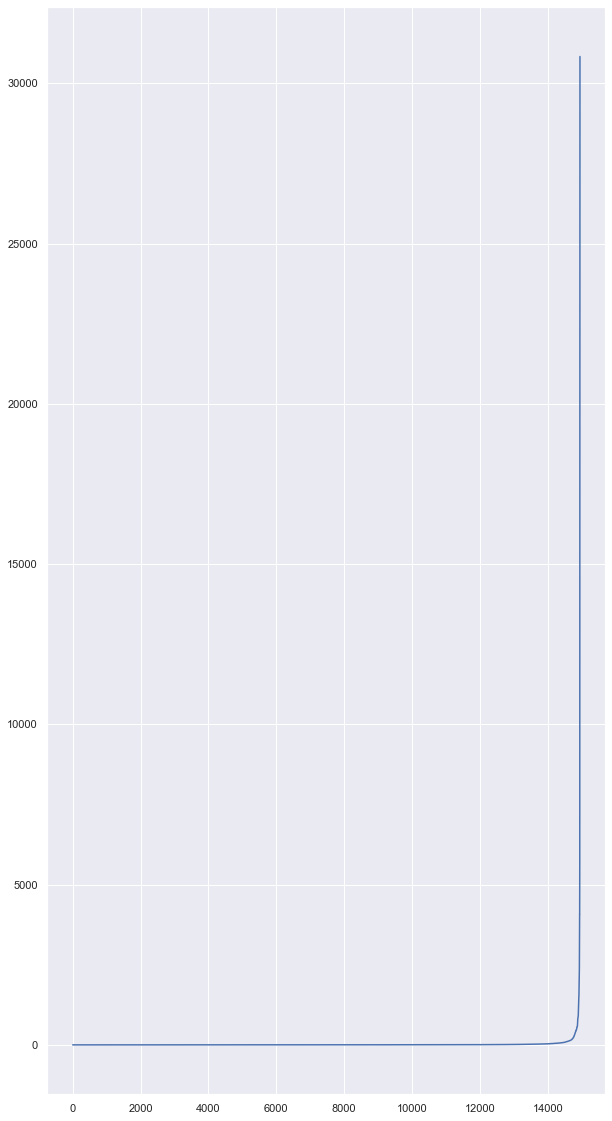

In [38]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 20))  
plt.plot(distances)


Text(0.5, 1.0, 'DBSCAN')

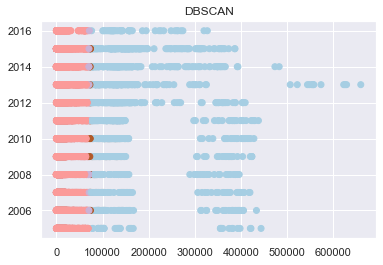

In [46]:
db = DBSCAN(eps=1000, min_samples=50)
db.fit(X)
y_pred3 = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred3, cmap='Paired')
plt.title("DBSCAN")

# best wish